In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-t2mm9sgs
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-t2mm9sgs
  Resolved https://github.com/facebookresearch/detectron2.git to commit dd2db71b0f8d855b71cac655186cbddca1bfda93
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

In [ ]:
# COMMON LIBRARIES
import os
import cv2

from datetime import datetime
from google.colab.patches import cv2_imshow

# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
NUM_CLASSES = 14
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/model_final.pth"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES  # should be the same number as in the trained model

predictor = DefaultPredictor(cfg)


In [ ]:
import cv2


In [ ]:
    img = cv2.imread('/content/spray.png')
    outputs = predictor(img)
    print(outputs)

{'instances': Instances(num_instances=100, image_height=1450, image_width=2076, fields=[pred_boxes: Boxes(tensor([[ 235.8203,  323.0380,  316.8898,  357.7766],
        [1037.9878, 1059.9095, 1112.2996, 1126.4537],
        [ 405.5516,  306.4883,  472.7895,  372.0178],
        [  10.4785,  501.2939,  140.0754,  631.9944],
        [1020.4724, 1186.0411, 1072.9401, 1227.2666],
        [ 968.1849,  375.3295, 1016.2153,  412.8531],
        [1675.9619,  375.4691, 1737.4039,  433.9801],
        [  75.7317,  987.5383,  195.6811, 1072.0277],
        [1260.8682,  190.4569, 1433.0452,  298.5712],
        [  13.2954,  256.3206,  104.3705,  340.2073],
        [ 582.0840,  533.0533,  639.1299,  585.1009],
        [ 118.4004, 1081.5747,  287.2078, 1175.6678],
        [1908.7324,  324.2063, 1937.9771,  378.4198],
        [ 160.2213,  799.1066,  203.3961,  835.1277],
        [1854.7231, 1025.1359, 1996.7191, 1100.7788],
        [ 186.5623,  971.8364,  260.5387, 1012.3320],
        [ 105.3242,  757.0675,

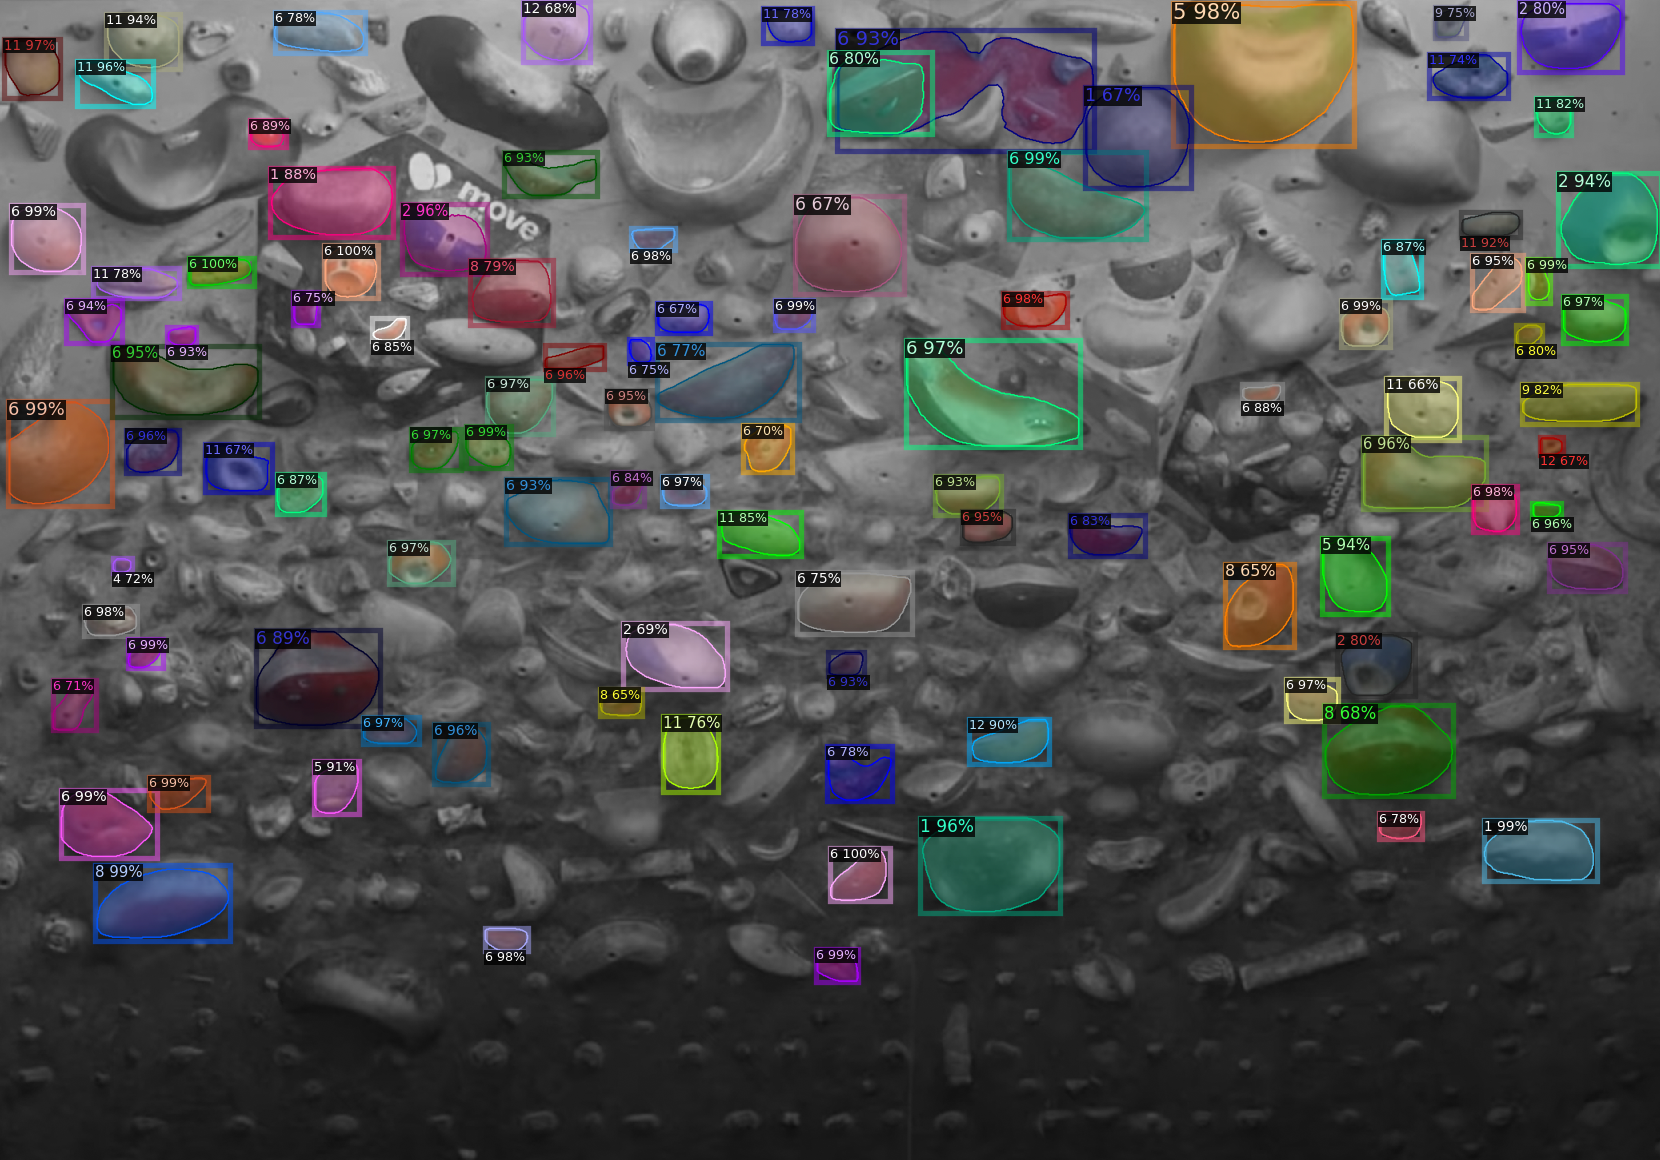

In [ ]:
visualizer = Visualizer(
        img[:, :, ::-1],
        scale=0.8, 
        instance_mode=ColorMode.IMAGE_BW
    )
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
import numpy as np


In [ ]:
# print(outputs['instances'][3])
instances = outputs['instances']

pred_boxes = instances.pred_boxes
# Convert the Boxes object to tensor
pred_boxes_tensor = pred_boxes.tensor

# Transfer the tensor to CPU and convert it to numpy
pred_boxes_numpy = pred_boxes_tensor.cpu().numpy()

print(pred_boxes_numpy)


[[ 235.82025    323.038      316.88983    357.7766   ]
 [1037.9878    1059.9095    1112.2996    1126.4537   ]
 [ 405.55164    306.4883     472.78946    372.01782  ]
 [  10.478522   501.29388    140.07542    631.99445  ]
 [1020.47235   1186.0411    1072.9401    1227.2666   ]
 [ 968.18494    375.32947   1016.2153     412.8531   ]
 [1675.9619     375.4691    1737.4039     433.98013  ]
 [  75.731705   987.53827    195.68108   1072.0277   ]
 [1260.8682     190.45692   1433.0452     298.5712   ]
 [  13.295448   256.32056    104.37052    340.20734  ]
 [ 582.084      533.0533     639.12994    585.1009   ]
 [ 118.400406  1081.5747     287.20782   1175.6678   ]
 [1908.7324     324.20627   1937.977      378.4198   ]
 [ 160.22128    799.10657    203.3961     835.1277   ]
 [1854.7231    1025.1359    1996.7191    1100.7788   ]
 [ 186.56227    971.8364     260.53873   1012.33203  ]
 [ 105.32419    757.0675     171.48196    795.4255   ]
 [1466.3055       3.6059723 1692.3121     182.39024  ]
 [1840.802

In [ ]:
# Suppose pred_boxes_numpy is your numpy array containing bounding boxes in the form [x1, y1, x2, y2]

# Compute the center of the bounding boxes
xc = (pred_boxes_numpy[:, 0] + pred_boxes_numpy[:, 2]) / 2
yc = (pred_boxes_numpy[:, 1] + pred_boxes_numpy[:, 3]) / 2

# Combine xc and yc to form the center coordinates
center_coordinates = np.stack([xc, yc], axis=-1)

print(center_coordinates)

[[ 276.35504   340.4073  ]
 [1075.1437   1093.1816  ]
 [ 439.17053   339.25305 ]
 [  75.27697   566.64417 ]
 [1046.7062   1206.6538  ]
 [ 992.2001    394.09128 ]
 [1706.6829    404.7246  ]
 [ 135.70639  1029.783   ]
 [1346.9567    244.51407 ]
 [  58.832985  298.26395 ]
 [ 610.60693   559.0771  ]
 [ 202.80411  1128.6213  ]
 [1923.3547    351.31305 ]
 [ 181.80869   817.1171  ]
 [1925.7212   1062.9573  ]
 [ 223.5505    992.0842  ]
 [ 138.40308   776.24646 ]
 [1579.3088     92.99811 ]
 [1868.7638    636.4066  ]
 [ 633.01605  1174.5614  ]
 [ 816.40576   298.81973 ]
 [1293.6587    387.66296 ]
 [ 855.88513   613.8467  ]
 [ 545.1892    561.5298  ]
 [1639.9441    875.338   ]
 [  40.070885   85.22632 ]
 [ 526.32715   703.70074 ]
 [1241.262     491.50726 ]
 [ 649.8754    507.95654 ]
 [1993.2686    399.1182  ]
 [ 488.67535   913.72815 ]
 [ 576.4491    942.77795 ]
 [1780.6704    591.49664 ]
 [1237.9669   1081.8324  ]
 [ 143.52988   104.25862 ]
 [1933.6245    637.69653 ]
 [ 555.5543    298.5     ]
 

In [ ]:

start_hold_idx = np.argmax(center_coordinates[:, 1])
maxvalue = center_coordinates[start_hold_idx][1]

end_hold_idx = np.argmin(center_coordinates[:, 1])
minvalue = center_coordinates[end_hold_idx][1]

diff = maxvalue - minvalue

# Determine 20% range for start and end holds
start_upper = maxvalue - 0.1 * diff
start_lower = maxvalue - 0.2 * diff

end_upper = minvalue + 0.2 * diff
end_lower = minvalue + 0.1 * diff

# Get the indices within the 20% range for start and end
start_indices = np.where((center_coordinates[:, 1] <= start_upper) & (center_coordinates[:, 1] >= start_lower))[0]
end_indices = np.where((center_coordinates[:, 1] <= end_upper) & (center_coordinates[:, 1] >= end_lower))[0]

# Choose a random index within the start and end range
random_start_idx = np.random.choice(start_indices)
random_end_idx = np.random.choice(end_indices)


In [ ]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(center_coordinates, center_coordinates)
print(dist_matrix)

[[   0.         1097.60307506  162.81958199 ... 1511.53664965
   733.90894327 1363.14698826]
 [1097.60307506    0.          986.3418057  ...  912.4916527
   368.47604853  601.76056544]
 [ 162.81958199  986.3418057     0.         ... 1350.03978284
   635.31801315 1209.54551545]
 ...
 [1511.53664965  912.4916527  1350.03978284 ...    0.
  1066.92030217  319.19057275]
 [ 733.90894327  368.47604853  635.31801315 ... 1066.92030217
     0.          807.22428156]
 [1363.14698826  601.76056544 1209.54551545 ...  319.19057275
   807.22428156    0.        ]]


In [ ]:
def generate_path(holds, start_idx, end_idx, max_move_dist, dist_matrix):
    path = [start_idx]
    current_hold_idx = start_idx

    while current_hold_idx != end_idx:
        print('hi')
        possible_moves = np.where(dist_matrix[current_hold_idx, :] < max_move_dist)[0]
        possible_moves = [idx for idx in possible_moves if idx not in path]

        if not possible_moves:
            print(current_hold_idx)
            raise ValueError("No possible moves. Increase max_move_dist or change holds.")
        
        # Get the Euclidean distances to the end hold for all possible moves
        distances_to_end = np.sqrt(np.sum((holds[possible_moves] - holds[end_idx])**2, axis=1))

        # Choose the hold with the smallest distance to the end hold
        next_hold_idx = possible_moves[np.argmin(distances_to_end)]
        
        path.append(next_hold_idx)
        current_hold_idx = next_hold_idx

    return path

In [ ]:
max_move_dist = 300

path = generate_path(center_coordinates, random_start_idx, random_end_idx, max_move_dist, dist_matrix)


hi
hi
hi
hi
hi
hi
hi
hi


In [ ]:
# print(center_coordinates[19])
print(path)

[78, 24, 99, 66, 27, 5, 37, 2, 58]


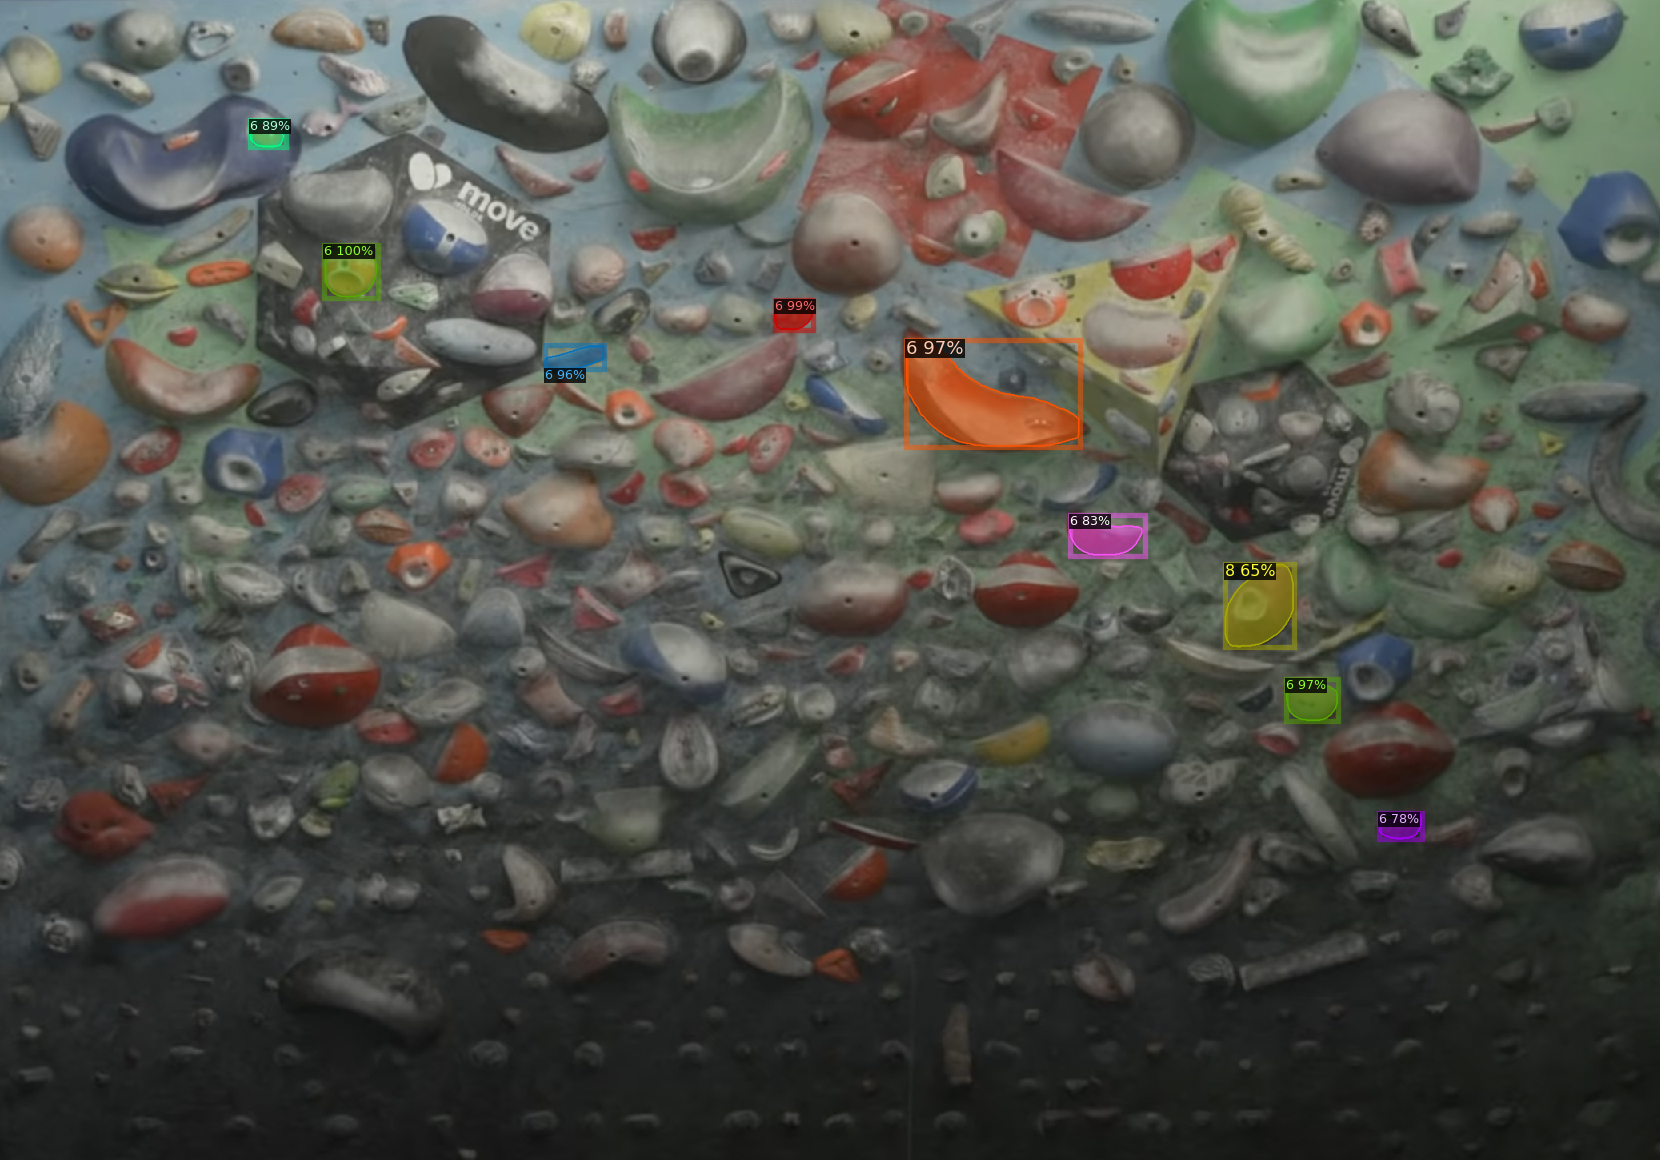

In [ ]:
from detectron2.utils.visualizer import ColorMode, Visualizer
import matplotlib.pyplot as plt

# Create a custom colormap with one color for all classes
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in range(20)]
colors = colors * (max(outputs["instances"].pred_classes) + 1)
colors = [(int(255*c[0]), int(255*c[1]), int(255*c[2])) for c in colors]

visualizer = Visualizer(
    img[:, :, ::-1],
    scale=0.8, 
    instance_mode=ColorMode.IMAGE_BW, 
)
visualizer._instance_mode = ColorMode.IMAGE
visualizer.metadata.thing_colors = colors

filtered_instances = outputs["instances"][path]
out = visualizer.draw_instance_predictions(filtered_instances.to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])